<h1>CIFAR-10 Klassifizierung mit CNN</h1>

In diesem Notebook geht es darum, mit einem CNN (Convolution Neural Network) Klassifizierungen durchzuführen.

Anders als bei einem ANN, nutzt ein CNN vor dem eigentlichen Dense-Netzwerk Filter, die dafür zuständig sind, Feature zu extrahieren. Mittels Polling wird die Größe von Bildern reduziert und am Ende wird das Bild durch einen Flattern-Layer in ein 1D Array umgewandelt.

Einer der Vorteile ist, das dadurch die Positionen die variieren können (z. B. von Augen) weniger eine Rolle spielen. <br>
  => Auch wenn die Features wie Augen woanders sind, werden diese trotzdem erkannt.

Ein CNN besteht aus 2 Komponenten: <br>
1: Feature-Extraktion durch Convolution + ReLu, dann Pooling. Dann ggf. wieder Convolution + ReLu ... <br>
2: Nach dem Pooling kommt das Dense-Netzwerk, also quasi ein ANN was zugeschaltet wird. 

Wir haben auch ein ANN mit diesem Dataset trainiert. Später sehen wir, dass die Genauigkeit sich verbessert hat.

> The CIFAR-10 dataset
https://www.cs.toronto.edu/~kriz/cifar.html [Letzter Zugriff: 16.06.2024]
>
> Reference:
Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.

In [1]:
# Imports.
import tensorflow as tf
import pandas     as pd
import numpy      as np
import seaborn    as sn

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

In [2]:
# Lade CIFAR-10 Dataset via Tensorflow.
# - Siehe auch: https://www.tensorflow.org/api_docs/python/tf/keras/datasets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data() 

In [3]:
X_train.shape

(50000, 32, 32, 3)

Das Dataset beinhaltet 10 Klassen und 60K Bilder. Davon werden 50K für das Training eingesetzt.

In [4]:
# Erstelle Namedict. 
name_dict = { 0: "airplane", 1:	"automobile", 2: "bird", \
        3:	"cat", 4: "deer", 5: "dog", 6: "frog", \
        7:	"horse", 8:	"ship", 9: "truck"
}

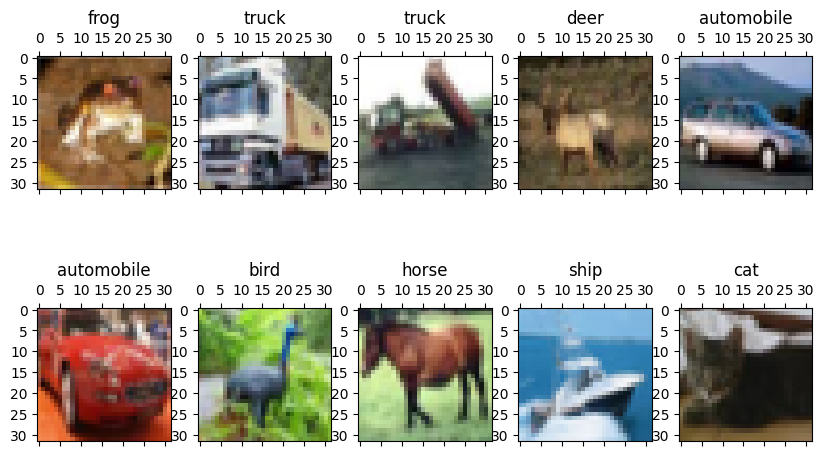

In [7]:
# Damit können wir uns einige Bilder anzeigen.
fig, axs = plt.subplots(2,5, figsize=(10, 6))
axs = axs.ravel()

for i in range(10):
    axs[i].title.set_text( name_dict[ int(y_train[i]) ])
    axs[i].matshow(X_train[i])

Der nächste Schritt ist, die Bilder zu normalisieren. 

In [6]:
X_train_scaled = X_train / 255   # Array dividieren durch 255.
X_test_scaled  =  X_test / 255

In [15]:
X_train_scaled[:1]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [13]:
y_train.shape

(50000,)

In [11]:
# Reshape das Array
y_train = y_train.reshape(-1, )
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

Ein CNN Model ist auch einfach zu erstellen.

In [26]:
model = tf.keras.Sequential([
    ### Faltungsnetz: ##
    # filter:      Anzahl der Filter
    # kernel_size: Größe des Filters, z. B. 3 x 3
    tf.keras.layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu'),  # Convolution Operation + Aktivierung
    tf.keras.layers.MaxPooling2D((2,2)),  # Pooling Typ: Max, Fenstergröße: 2 x 2
    #---------
    tf.keras.layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu'),  
    tf.keras.layers.MaxPooling2D((2,2)), 
    ### ANN Dense ###
    tf.keras.layers.Flatten(),
   # tf.keras.layers.Dropout(0.2),  # 20%
    tf.keras.layers.Dense(units=60,  activation='relu'),
    tf.keras.layers.Dense(units=10,  activation='softmax')  
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/cifar10cnn/base", histogram_freq=1)

model.compile(
    optimizer = 'adam',
    loss      = 'sparse_categorical_crossentropy',
    metrics   = ['accuracy']
)

In [27]:
model.fit(X_train_scaled, y_train, epochs=6, callbacks=[tb_callback])

Epoch 1/6
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5184 - accuracy: 0.4505
Epoch 2/6
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1919 - accuracy: 0.5812
Epoch 3/6
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0783 - accuracy: 0.6236
Epoch 4/6
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9973 - accuracy: 0.6519
Epoch 5/6
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9446 - accuracy: 0.6701
Epoch 6/6
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8915 - accuracy: 0.6894


Man sieht deutlich eine Verbesserung der Genauigkeit im Vergleich eines ANNs ohne ein Faltungsnetz.

In [29]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9542 - accuracy: 0.6699


[0.9542121887207031, 0.6699000000953674]

In [30]:
X_train_scaled[:1]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [31]:
model.predict(X_test[:1])

1/1 [==============================] - 0s 80ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

Jetzt erstellen wir eine Heat-Map, dafür müssen die Predictions eingesammelt werden.
Als Output bekommen wir hier [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dabei steht 1 für die Klasse, die Predictet wurde. Index = Klasse.

In [32]:
# Array mit zutreffenden Klassen, aus dem Array der Prediction. 
# - Index = Klasse
target_predicted = [np.argmax(i) for i in model.predict(X_test_scaled) ]

313/313 [==============================] - 1s 3ms/step


In [33]:
# Mit TF kann direkt die Beschriftung mit angegeben werden.
tf.math.confusion_matrix(labels=y_test, predictions=target_predicted)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[764,  22,  49,  15,   8,   3,   8,   7,  92,  32],
       [ 38, 821,   3,   8,   1,   4,   5,   2,  37,  81],
       [ 94,  11, 614,  59,  61,  47,  49,  32,  21,  12],
       [ 42,  20, 115, 497,  63,  95,  74,  45,  31,  18],
       [ 39,   7, 167,  53, 560,  19,  63,  67,  19,   6],
       [ 27,   5, 127, 213,  46, 458,  30,  54,  24,  16],
       [ 13,  11,  88,  57,  41,  13, 749,   8,   9,  11],
       [ 32,   7,  78,  39,  65,  38,   8, 693,   7,  33],
       [ 85,  51,  15,   9,   5,   1,   4,   1, 802,  27],
       [ 51, 103,  11,  13,   7,   7,   8,  10,  49, 741]])>

Die Map sieht viel besser aus als die Map des ANN Models.

Text(95.72222222222221, 0.5, 'Truth')

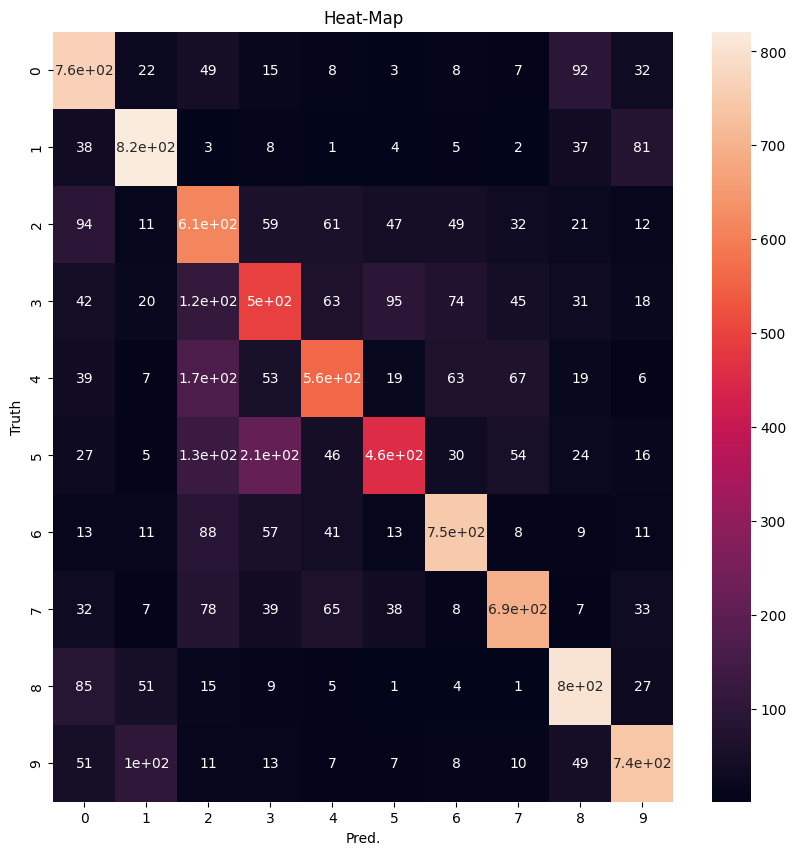

In [34]:
# Mit Matplotlib und Seaborn visualisieren.
heatmap = tf.math.confusion_matrix(labels=y_test, predictions=target_predicted)
plt.figure(figsize=(10, 10))
sn.heatmap(heatmap, annot=True)
plt.title("Heat-Map")
plt.xlabel("Pred.")
plt.ylabel("Truth")

In [36]:
print(classification_report(y_test, target_predicted))

              precision    recall  f1-score   support

           0       0.64      0.76      0.70      1000
           1       0.78      0.82      0.80      1000
           2       0.48      0.61      0.54      1000
           3       0.52      0.50      0.51      1000
           4       0.65      0.56      0.60      1000
           5       0.67      0.46      0.54      1000
           6       0.75      0.75      0.75      1000
           7       0.75      0.69      0.72      1000
           8       0.74      0.80      0.77      1000
           9       0.76      0.74      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

